

https://data.humdata.org/dataset/cod-ab-ukr

This dataset is structured into 4 levels:
- Admin 1: 27 Oblast (Region)
- Admin 2: 139 Raion (District)
- Admin 3: 1769 Hromada (Community)
- Admin 4: 29706 Settlement, partial coverage

Note: This dataset is structured into 4 levels: - Admin 1: 27 oblast (region) with three exceptions - Admin 2: 139 raion (district) with three exceptions - Admin 3: 1769 hromada (community) with three exceptions - Admin 4: 29706 populated place (city, settlement or village), partial coverage

In [3]:
import pymongo
import pandas as pd
import geopandas as gpd


oblast_f = "ukr_admin1.geojson"      
district_f =  "ukr_admin0.geojson"      
communinity_f = "ukr_admin2.geojson"

# ukr_adminlines.geojson  
# ukr_admin3.geojson      
# ukr_admincapitals.geojson  
#ukr_adminpoints.geojson  
# ukr_admin4.geojson   
    

gdf = gpd.read_file(communinity_f)

In [4]:
gdf.set_index("adm2_name", inplace=True)


In [5]:
gdf.index

Index(['Bakhchysaraiskyi', 'Bilohirskyi', 'Dzhankoiskyi', 'Yevpatoriiskyi',
       'Kerchenskyi', 'Kurmanskyi', 'Perekopskyi', 'Simferopolskyi',
       'Feodosiiskyi', 'Yaltynskyi',
       ...
       'Vyzhnytskyi', 'Dnistrovskyi', 'Chernivetskyi', 'Koriukivskyi',
       'Nizhynskyi', 'Novhorod-Siverskyi', 'Prylutskyi', 'Chernihivskyi',
       'Kyiv', 'Sevastopol'],
      dtype='object', name='adm2_name', length=139)

In [11]:
# Use this to find if don't know spelling

gdf.filter(like="Ode",axis="index")

,adm2_name1,adm2_name2,adm2_name3,adm2_pcode,adm1_name,adm1_name1,adm1_name2,adm1_name3,adm1_pcode,adm0_name,...,valid_to,area_sqkm,version,lang,lang1,lang2,lang3,center_lat,center_lon,geometry
adm2_name,,,,,,,,,,,,,,,,,,,,,
Odeskyi,Одеський,None,None,UA5110,Odeska,Одеська,None,None,UA51,Ukraine,...,None,3951.642032,v05,en,uk,None,None,None,None,"MULTIPOLYGON (((30.86377 46.92642, 30.86337 46..."


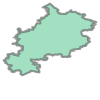

In [12]:

FIND="Kharkivskyi"

location=gdf.loc[FIND]
location['geometry']

In [13]:
print(location['geometry'])

POLYGON ((36.19469850500019 50.40180495300018, 36.19452069000016 50.40191679300017, 36.194446977000155 50.40197206800002, 36.19262991700009 50.40308149600003, 36.191663440000184 50.40359300900013, 36.18929368600004 50.40455956500017, 36.18701378100013 50.40547898000011, 36.18650722800004 50.40568645100018, 36.1846119600001 50.40647458299998, 36.181497074000106 50.40451053700019, 36.17965289600011 50.40333282200004, 36.178765252 50.40275729200016, 36.177883205000114 50.40218160300009, 36.177002701000106 50.40154517000008, 36.17697957700017 50.401571327, 36.176640920000125 50.401313512000115, 36.175533362000124 50.400401225, 36.173634066000034 50.398765893000075, 36.172781797000084 50.39819345100011, 36.166174763000186 50.39411381999997, 36.16361221400018 50.392509037000195, 36.160468197 50.39091855400011, 36.15415429900003 50.38801628000016, 36.14795955700015 50.38551419400005, 36.14439838500016 50.38400585200014, 36.13902683700019 50.381410377000066, 36.13736037300015 50.38071244300005

In [14]:
from ipyleaflet import Map, basemaps, GeoJSON
import shapely
import json

geom = gdf.loc[FIND, "geometry"]

geojson = {
    "type": "Feature",
    "geometry": json.loads(shapely.to_geojson(geom)),  # geometry-only dict
    "properties": {"name":  location['adm2_name1']},
}

centroid = geom.centroid
m = Map(center=(centroid.y, centroid.x), zoom=11, basemap=basemaps.OpenStreetMap.Mapnik)

m.add(GeoJSON(
    data=geojson,
    style={"color": "yellow", "weight": 2, "fillColor": "blue", "fillOpacity": 0.3},
))

m


Map(center=[49.99407817866197, 36.18545720527945], controls=(ZoomControl(options=['position', 'zoom_in_text', …